<a href="https://colab.research.google.com/github/tibernard/AI/blob/master/Maze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maze Generation

In [0]:
import numpy as np
import matplotlib.pyplot as pyplot

def Generate_Maze(dim=4, pr=0.6):
    shape = dim,dim
    # Create the matrix
    Z = np.zeros(shape, dtype=bool)
    # Generate random distribution of empty or non empty cells (0 is empty and 1 is non empty)
    Z=np.random.choice([0, 1], p=[1-pr,pr], size=(dim, dim))
    # Exclude Upper left and down right cell 
    Z[0,0]=0
    Z[-1,-1]=0
    return Z



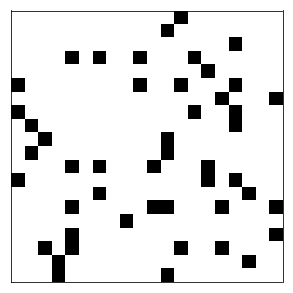

In [0]:
#0.1;
pyplot.figure(figsize=(10, 5))
pyplot.imshow(Generate_Maze(20,0.1), cmap=pyplot.cm.binary, interpolation='nearest',aspect='equal')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()

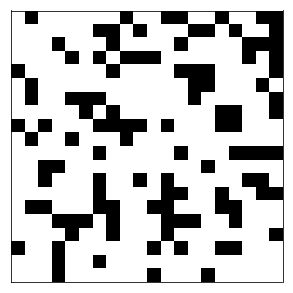

In [0]:
#0.3
pyplot.figure(figsize=(10, 5))
pyplot.imshow(Generate_Maze(20,0.3), cmap=pyplot.cm.binary, interpolation='nearest',aspect='equal')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()

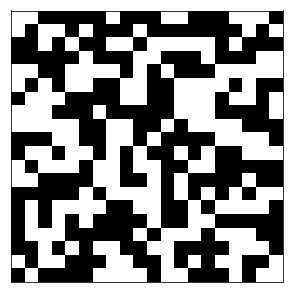

In [0]:
#0.5
pyplot.figure(figsize=(10, 5))
pyplot.imshow(Generate_Maze(20,0.5), cmap=pyplot.cm.binary, interpolation='nearest',aspect='equal')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()

# Implementing BFS Algorithm

In [0]:
def generate_graph(maze): #This function consist to represent our matrix in the form of dictionary (Adjency List. 
    graph = {(i, j): [] for j in range(len(maze)) for i in range(len(maze)) } #Initialize our adjency list 
    for row, col in graph.keys():
        #Between lines we can down (D) and up (U) except in the first line and last line where we can go UP or Down
        if row < len(maze) - 1: 
            graph[(row, col)].append(("D", (row + 1, col)))
            graph[(row + 1, col)].append(("U", (row, col)))
            #Between clomns we can Right (R) and Left (L) except in the first column and last column where we can go UP or Down
        if col < len(maze) - 1: 
            graph[(row, col)].append(("R", (row, col + 1)))
            graph[(row, col + 1)].append(("L", (row, col)))
    return graph
  


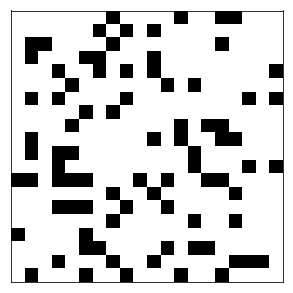

In [0]:
# This Part is to generate the initial Maze that will be used by the Search algorithms
#We take a copy of the original Maze because to avoid modify the maze with the differents paths finding by the Searchh algorithms
Maze=Generate_Maze(20,0.2)
dfs_Maze=Maze.copy()
bfs_Maze=Maze.copy()
bd_bfs_Maze=Maze.copy()
Astar_E_Maze=Maze.copy()
Astar_M_Maze=Maze.copy()
#fring_size=0
#s_Maze=Maze.copy()
def View_Maze(Maze):
  pyplot.figure(figsize=(20, 5))
  pyplot.imshow(Maze, cmap=pyplot.cm.Greys, animated=True, interpolation='nearest',aspect='equal')
  pyplot.xticks([]), pyplot.yticks([])
  pyplot.show()
  
View_Maze(Maze)


DDDDDDDDDDDRRDDDDRRRRDRRRRRRRRRDRRRRDD


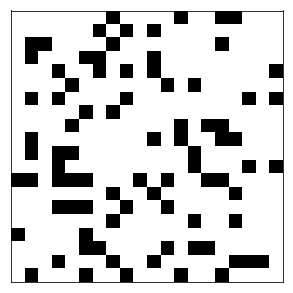

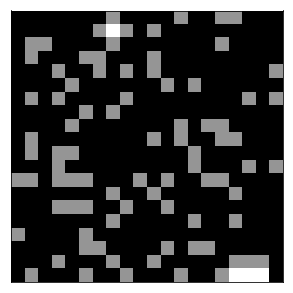

In [0]:
initial_state,goal_state=(0,0),(len(Maze)-1,len(Maze)-1)
restricted_states= {(i, j): [] for j in range(len(Maze)) for i in range(len(Maze)) if Maze[i][j]}

def bfs_search(initial_state, goal_state, restricted_states):
  from collections import deque
  graph = generate_graph(Maze) # We get the adjency list version of our maze to facilitate the retrieval of the neighbors
  #bfs_Maze=Maze.copy()

  fringe = deque([("", initial_state)]) #Initialise the fringe with the initial state which (0,0)
  prev= []
  closed_set = set()
  i=1
  while fringe: #While there is nodes in the fringe that are not explored yet
    path,current_state = fringe.popleft() # We pop the oldest values from the queue
    
    if current_state not in closed_set: #To avoid checking the visited states
      
      if current_state == goal_state: #Success Termination condition
        #print(closed_set)
        bfs_Maze[goal_state]=2 #We marked the goal state as part of the valid path
        return path
      else:
        for action,neighbor in graph[current_state]:
          if neighbor not in restricted_states.keys():
            fringe.append((path + action, neighbor))
            #prev[ neighbor ] = current_state
            bfs_Maze[current_state]=2 #All the path marked
            closed_set.add( current_state ) #Save the visisted state
  return "No Solution" # Unsuccess termination condition after we finish to visit all the nodes

print(bfs_search(initial_state, goal_state, restricted_states))
View_Maze(Maze)
View_Maze(bfs_Maze)




# Implementing DFS Algorithm

RRRRRDDLDDRDRRRRRDRRRRRRDRRRDDDLDDRDDDDDDD


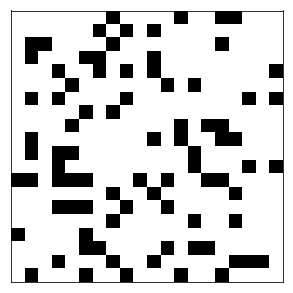

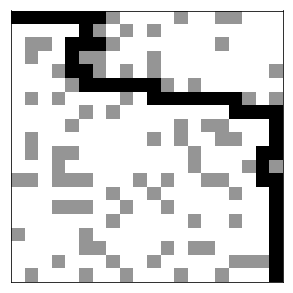

In [0]:
initial_state,goal_state=(0,0),(len(Maze)-1,len(Maze)-1)
restricted_states= {(i, j): [] for j in range(len(Maze)) for i in range(len(Maze)) if Maze[i][j]}

#The DFS is exactly the same as BFS except we use a stack (we pop the newest value)
#We copy paste the same BFS algorithm, we only change the way we are poping the node from the queue
def dfs_search(initial_state, goal_state, restricted_states):
  from collections import deque
  graph = generate_graph(Maze)
  #dfs_Maze=Maze.copy()
  fringe = deque([("", initial_state)])
  prev= []
  closed_set = set()
  global fring_size
  global moves_count
  global path_length
  
  i=1
  moves_count=0
  while fringe:
    path,current_state = fringe.pop()
    moves_count=moves_count+1
    if current_state not in closed_set:
      
      if current_state == goal_state:
        #print(closed_set)
        dfs_Maze[goal_state]=2
        dfs_fring_size= len(fringe) #Size of the fringe is saved in a global varibale
        fring_size=dfs_fring_size
        path_length=len(path)
        #print(fring_size)
        return path 
      else:
        for action,neighbor in graph[current_state]:
          if neighbor not in restricted_states.keys():
            fringe.append((path + action, neighbor))
            #prev[ neighbor ] = current_state
            dfs_Maze[current_state]=2
            closed_set.add( current_state )
  return "No Solution"

print(dfs_search(initial_state, goal_state, restricted_states))
View_Maze(Maze)
View_Maze(dfs_Maze)

# Implementing BD-BFS Algorithm

DDDDDDDDDDDRRDDDDRRR-UUUUUUUUUUUUUUULUU


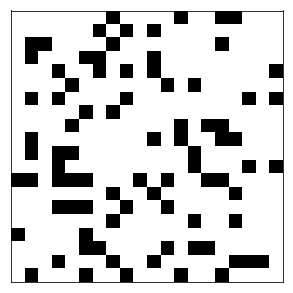

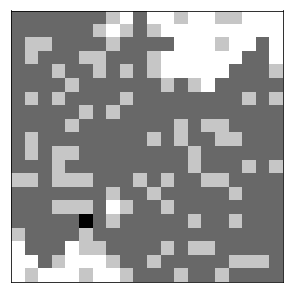

In [0]:
initial_state,goal_state=(0,0),(len(Maze)-1,len(Maze)-1)
restricted_states= {(i, j): [] for j in range(len(Maze)) for i in range(len(Maze)) if Maze[i][j]}
# The general idea of this algorithm is to run two BFS in a fringe , one in forward and the other in backward
# And stop once we find an intersection node between them
def bd_bfs_search(initial_state, goal_state, restricted_states):
  from collections import deque
  graph = generate_graph(Maze)
  #bd_bfs_Maze=Maze.copy()
  fringe_start = deque([("", initial_state)]) #Starting state of forward BFS
  fringe_end = deque([("", goal_state)]) # Staring state of the Backward BFS
  prev= []
  closed_set_start = set() #Visited state for forward BFS
  closed_set_end = set() #Visited state for backward BFS
  i=1
  while fringe_start and fringe_end: #While we have univisted nodes in both fringes
    #print("fringe_start",fringe_start)
    #print("fringe_end",fringe_end)
    
    #Because we running BFS in both fringes , we pop the oldest values in both
    path_start,current_state_start = fringe_start.popleft()
    path_end,current_state_end = fringe_end.popleft()
    
    #print("current_state_start",current_state_start)
    #print("current_state_end",current_state_end)
    
    # Sam rules in BFS regarding the visisted nodes
    if current_state_end not in closed_set_end:
      #Condition of termination in the Backward process (Intersection nodes)
      if current_state_start == current_state_end or  current_state_end in closed_set_start:
        bd_bfs_Maze[current_state_end]=3
        return path_start+ "-"+path_end
      else:
        for action,neighbor in graph[current_state_end]:
          if neighbor not in restricted_states.keys():
            fringe_end.append((action+path_end , neighbor)) #  We write the path in the opposite way to the normal BFS
            #prev[ neighbor ] = current_state
            bd_bfs_Maze[current_state_end]=2
            closed_set_end.add( current_state_end )
    
    if current_state_start not in closed_set_start:
      #Condition of termination in the forward process  (Intersection nodes)
      if current_state_start == current_state_end or current_state_start in closed_set_end:
        bd_bfs_Maze[current_state_start]=3 # Special value used to marke the intersection node
        return path_start+ "-"+path_end # Concatenate the Forward and Backward paths
      else:
        for action,neighbor in graph[current_state_start]:
          if neighbor not in restricted_states.keys():
            fringe_start.append((path_start + action, neighbor))
            #prev[ neighbor ] = current_state
            bd_bfs_Maze[current_state_start]=2
            closed_set_start.add( current_state_start )
            
   
   
  return "No Solution"

print(bd_bfs_search(initial_state, goal_state, restricted_states))
#print(Maze)
View_Maze(Maze)
View_Maze(bd_bfs_Maze)

#maze2graph(Maze)

#RDDDRR
#DDDRRR


# A Star Euclidean Distance

DDDDDDDDDDDRRDDDDRRRRDRRRRRRRRRDRRRRDD


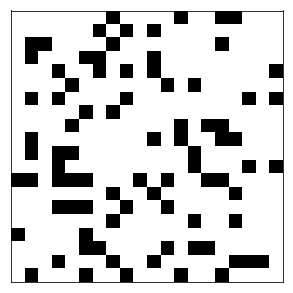

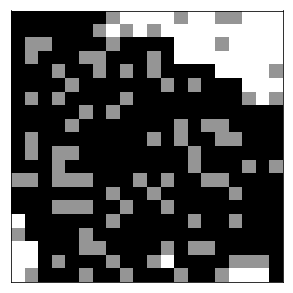

In [0]:
initial_state,goal_state=(0,0),(len(Maze)-1,len(Maze)-1)
restricted_states= {(i, j): [] for j in range(len(Maze)) for i in range(len(Maze)) if Maze[i][j]}

# Same comments as the Manhattan A star used Euclidian distance
def heuristic_dist(current_state, goal_state,d="M"):
  import math
  if d=="M": #Manhattan distance
    h=abs(current_state[0] - goal_state[0]) + abs(current_state[1] - goal_state[1])
  else: #Euclidian distance
    h=math.sqrt( (current_state[0] - goal_state[0])**2 +(current_state[1] - goal_state[1])**2)
  return h
  
def Astar_search_Ecludian(initial_state, goal_state, restricted_states):
  from heapq import heappop, heappush
  graph = generate_graph(Maze)

  fringe = []
  prev= []
  closed_set = set()
  g=0
  h=heuristic_dist(initial_state, goal_state,"E")
  f=g+h
  heappush(fringe, (f, g, "", initial_state))
  
  i=1
  while fringe:
    f,g,path,current_state  = heappop(fringe)
    
    if current_state not in closed_set:
      
      if current_state == goal_state:
        #print(closed_set)
        Astar_E_Maze[goal_state]=2
        return path
      else:
        for action,neighbor in graph[current_state]:
          if neighbor not in restricted_states.keys():
            h=heuristic_dist(neighbor, goal_state,"E")
            f=g+h
            heappush(fringe, (f, g+1, path+action, neighbor))
            #prev[ neighbor ] = current_state
            Astar_E_Maze[current_state]=2
            closed_set.add( current_state )
  return "No Solution"

print(Astar_search_Ecludian(initial_state, goal_state, restricted_states))
View_Maze(Maze)
View_Maze(Astar_E_Maze)




# A star Manhattan Distance


DDDDDDDDDDDRRDDDDRRRRDRRRRRRRRRDRRRRDD


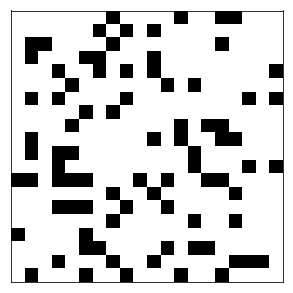

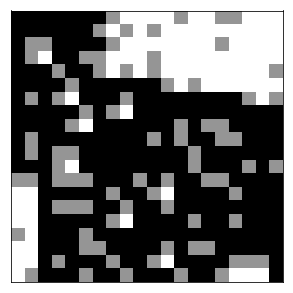

In [0]:
initial_state,goal_state=(0,0),(len(Maze)-1,len(Maze)-1)
restricted_states= {(i, j): [] for j in range(len(Maze)) for i in range(len(Maze)) if Maze[i][j]}


#This function returns both manhattan and Euclidian distance depending of the parameter "d"
def heuristic_dist(current_state, goal_state,d="M"):
  import math
  if d=="M": #Manhattan distance
    h=abs(current_state[0] - goal_state[0]) + abs(current_state[1] - goal_state[1])
  else: #Euclidian distance
    h=math.sqrt( (current_state[0] - goal_state[0])**2 +(current_state[1] - goal_state[1])**2)
  return h
  #The idea of this Algorithm is to calculate a total distance to the goal based on the
  # distance already ran which is g and estimate the remaing distance which is h(heuristic)
  #total distance f=g+h
  #the important thing is to use a min heap in order to always have an orderd tree based on f=g+h
def Astar_search_Manhattan(initial_state, goal_state, restricted_states):
  from heapq import heappop, heappush # Min Heap data structure used
  graph = generate_graph(Maze)

  fringe = []
  prev= []
  closed_set = set()
  g=0
  h=heuristic_dist(initial_state, goal_state,"M")
  f=g+h
  heappush(fringe, (f, g, "", initial_state)) #initialize the heap with the items (f,g,empty path and (0,0))
  
  i=1
  global Astar_moves_count # This is used to count the total nodes expanded
  Astar_moves_count=0
  while fringe:
    f,g,path,current_state  = heappop(fringe) #Take the min node from the heap
    Astar_moves_count=Astar_moves_count+1 # Count the nodes expanded
    
    if current_state not in closed_set:
      
      if current_state == goal_state: #Successful Termination condition 
        #print(Astar_moves_count)
        Astar_M_Maze[goal_state]=2
        return path
      else:
        for action,neighbor in graph[current_state]: #Get neighbors from the graph
          if neighbor not in restricted_states.keys():
            h=heuristic_dist(neighbor, goal_state,"M")
            f=g+h
            heappush(fringe, (f, g+1, path+action, neighbor))
            #prev[ neighbor ] = current_state
            Astar_M_Maze[current_state]=2 #Marked the paths
            closed_set.add( current_state )
  return "No Solution"
Traversing
print(Astar_search_Manhattan(initial_state, goal_state, restricted_states))
View_Maze(Maze)
View_Maze(Astar_M_Maze)




# Hard Maze -Local Search and DFS with Maximal Fringe Size

RRDRRRRDRRRRRRDRDRRRRDDDRDRDLLDLDLULDLUURURRULUULDLDLDDDDDDRRDRRRRRDLDDDRD
Fringe size 189


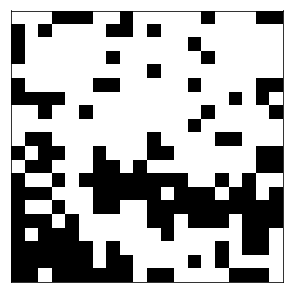

Path length 142


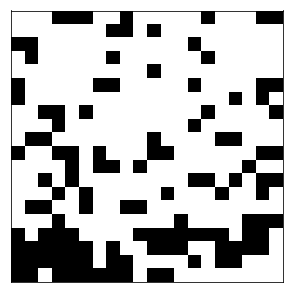

Nodes Expanded 606


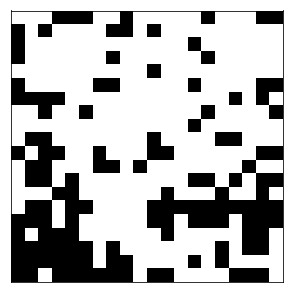

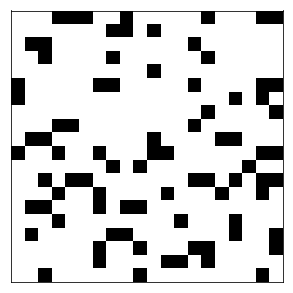

In [0]:
#global fring_size
def hill_climbing(v_maze):
  x_initial_state,x_goal_state=(0,0),(len(v_maze)-1,len(v_maze)-1)
  x_restricted_states= {(i, j): [] for j in range(len(v_maze)) for i in range(len(v_maze)) if v_maze[i][j]}

  hard_Maze_fringe=Maze.copy()
  hard_Maze_path=Maze.copy()
  hard_Maze_moves=Maze.copy()
  new_Maze=Maze.copy()
  #fring_size=0
  iteration=20
  
  moves=0
  k=0
  Not_solvable="No Solution"
  print(dfs_search(x_initial_state, x_goal_state, x_restricted_states))
  #Initial check if 
  if Not_solvable!=dfs_search(x_initial_state, x_initial_state, x_initial_state):
    old_fringe_size=fring_size
    old_path_length=path_length
    old_moves_count=moves_count
    # Run for for fix number of iteration before stop
    while (k<=iteration):
      # For each cell, we change it to 1(wall) if it was 0(empty) and 0 otherwise
      for i in range(len(new_Maze)):
        for j in range(len(new_Maze)):
          if new_Maze[i][j]==0:
            new_Maze[i][j]=1
          else:
            new_Maze[i][j]=0
          x_initial_state,x_goal_state=(0,0),(len(new_Maze)-1,len(new_Maze)-1)
          x_restricted_states= {(i, j): [] for j in range(len(new_Maze)) for i in range(len(new_Maze)) if new_Maze[i][j]}
          #Here we solve the New configuration of the maze with DFS
          if Not_solvable!=dfs_search(x_initial_state, x_goal_state, x_restricted_states):
            #We save the fringe size which is a parameter of complexity
            new_fringe_size=fring_size
            new_path_length=path_length
            new_moves_count=moves_count
            #print(new_fringe_size)
          else:
            new_Maze[i][j]=0 # In case the new configuration is not solvable we get back to the previous configuration
          if old_fringe_size<new_fringe_size: #Check if we find a worst fringe size
            old_fringe_size=new_fringe_size
            hard_Maze_fringe=new_Maze.copy()
            
          if old_path_length<new_path_length: #Check if we find a worst path length
            old_path_length=new_path_length
            hard_Maze_path=new_Maze.copy()
           
          if old_moves_count<new_moves_count: #Check if we find a worst  moves
            old_moves_count=new_moves_count
            hard_Maze_moves=new_Maze.copy()
            
      k=k+1
    print("Fringe size",old_fringe_size)
    View_Maze(hard_Maze_fringe) 
    print("Path length",old_path_length)#show the hard maze based on worst fringe
    View_Maze(hard_Maze_path)
    print("Nodes Expanded",old_moves_count)#show the hard maze based on worst path length
    View_Maze(hard_Maze_moves)      #show the hard maze based on worst moves count
          
  else:
    return "Initial Maze not Solvable"
  
    
    
NewMaze=Generate_Maze(20,0.2)
global Maze
#global dfs_Maze
global fring_size
global moves_count
global path_length
Maze=NewMaze.copy()
#dfs_Maze=Maze.copy()
#print(fring_size)
hill_climbing(Maze)
View_Maze(Maze)

# Hard Maze For A Star- Max nodes expanded

DDDDRDDDRRRRDDDDRDRDDDRRDRRRRRRDDRRRRD
Nodes Expanded 665


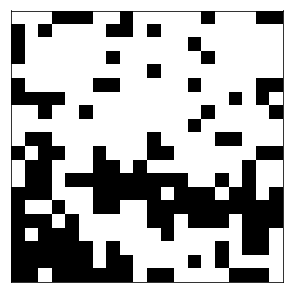

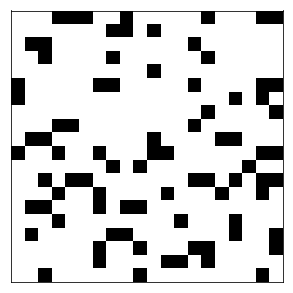

In [0]:
#global fring_size
def hill_climbing(v_maze):
  x_initial_state,x_goal_state=(0,0),(len(v_maze)-1,len(v_maze)-1)
  x_restricted_states= {(i, j): [] for j in range(len(v_maze)) for i in range(len(v_maze)) if v_maze[i][j]}

  hard_Maze_fringe=Maze.copy()
  hard_Maze_path=Maze.copy()
  hard_Maze_moves=Maze.copy()
  new_Maze=Maze.copy()
  #fring_size=0
  iteration=20
  
  moves=0
  k=0
  Not_solvable="No Solution"
  print(Astar_search_Manhattan(x_initial_state, x_goal_state, x_restricted_states))
  #Initial check if 
  if Not_solvable!=Astar_search_Manhattan(x_initial_state, x_initial_state, x_initial_state):
   
    old_moves_count=Astar_moves_count #Count of nodes expanded
    # Run for for fix number of iteration before stop
    while (k<=iteration):
      # For each cell, we change it to 1(wall) if it was 0(empty) and 0 otherwise
      for i in range(len(new_Maze)):
        for j in range(len(new_Maze)):
          if new_Maze[i][j]==0:
            new_Maze[i][j]=1
          else:
            new_Maze[i][j]=0
          x_initial_state,x_goal_state=(0,0),(len(new_Maze)-1,len(new_Maze)-1)
          x_restricted_states= {(i, j): [] for j in range(len(new_Maze)) for i in range(len(new_Maze)) if new_Maze[i][j]}
          #Here we solve the New configuration of the maze with DFS
          if Not_solvable!=Astar_search_Manhattan(x_initial_state, x_goal_state, x_restricted_states):
            #We save the fringe size which is a parameter of complexity
           
            new_moves_count=Astar_moves_count #Count of nodes expanded currently
            #print(new_moves_count)
          else:
            new_Maze[i][j]=0 # In case the new configuration is not solvable we get back to the previous configuration
          
           
          if old_moves_count<new_moves_count: #Check if we find a worst count nodes expanded
            old_moves_count=new_moves_count #Copy worst value
            hard_Maze_moves=new_Maze.copy() #Copy worst maze so far
            
      k=k+1
    
    print("Nodes Expanded",old_moves_count)#show the hard maze based on worst path length
    View_Maze(hard_Maze_moves)      #show the hard maze based on worst moves count
          
  else:
    return "Initial Maze not Solvable"
  
    
    
#NewMaze=Generate_Maze(20,0.2)
global Maze
#global dfs_Maze
global fring_size
global moves_count
global Astar_moves_count
global path_length
Maze=NewMaze.copy()
#dfs_Maze=Maze.copy()
#print(fring_size)
hill_climbing(Maze)
View_Maze(Maze)

# Maze on Fire

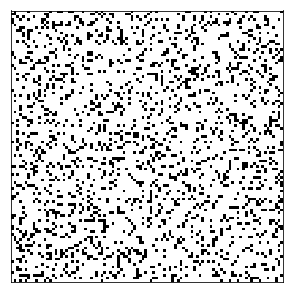

No Solution


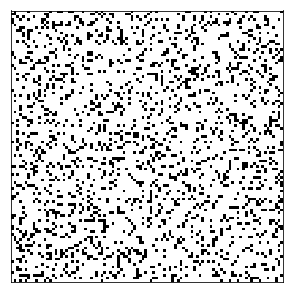

Text(0.5, 1.0, '# of Successes V Density of Fire')

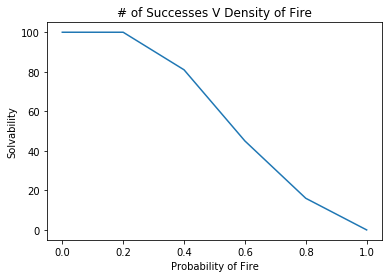

In [0]:
import numpy as np
import matplotlib.pyplot as pyplot
import random as ran

#This function generates the maze, with the addition of the fire cell in the upper right
def Fire_Maze(dim=4, pr=0.6):
    shape = dim,dim
    # Create the matrix
    Z = np.zeros(shape, dtype=bool)
    # Generate random distribution of empty or non empty cells (0 is empty and 1 is non empty)
    Z=np.random.choice([0, 1], p=[1-pr,pr], size=(dim, dim))
    # Exclude Upper left and down right cell 
    Z[0,0]=0
    Z[-1,-1]=0
    Z[0,-1]=1
    return Z

#Initializing objects of the DFS function for the dynamic maze
FMaze = Fire_Maze(100, 0.2)
initial_state,goal_state=(0,0),(len(FMaze)-1,len(FMaze)-1)
restricted_states= {(i, j): [] for j in range(len(FMaze)) for i in range(len(FMaze)) if FMaze[i][j] == 1}
empty_states= {(i, j): [] for j in range(len(FMaze)) for i in range(len(FMaze)) if FMaze[i][j] == 0}

def fire_search(initial_state, goal_state, restricted_states, empty_states, FMaze):
  from collections import deque
  graph = generate_graph(FMaze)
  fringe = deque([("", initial_state)])
  prev= []
  closed_set = set()
  
  i=1
  while fringe:
    path,current_state = fringe.pop()
    val = np.random.choice([0,1], p = (.5**i, (1-(.5)**i))) #value is either 0 or 1, with 0 < Q < 1
    
    if current_state not in closed_set:
      
      if(val == 1): #checks if a fire should pop every time step
        cell_on_fire = ran.choice(list(empty_states.keys()))
        y, x = cell_on_fire
        FMaze[x,y] = 1
        restricted_states.update({cell_on_fire: []})
        del empty_states[cell_on_fire]
      
      if current_state == goal_state: # End of the path, goal reached
        #print(closed_set)
        FMaze[goal_state]=2
        return path 
      else:
        for action,neighbor in graph[current_state]: # Keep looping until goal is found, make sure closed set is incremented by the current state to avoid backtracking
          if neighbor not in restricted_states.keys():
            fringe.append((path + action, neighbor))
            #prev[ neighbor ] = current_state
            FMaze[current_state]=2
            closed_set.add( current_state )
            i = i + 1 # part of the function to calculate the value, the k value
  return "No Solution"

View_Maze(FMaze)
print(fire_search(initial_state, goal_state, restricted_states, empty_states, FMaze))
View_Maze(FMaze)


pyplot.plot([0, .2, .4, .6, .8, 1],[100, 100, 81, 45, 16, 0] )
pyplot.ylabel("Solvability")
pyplot.xlabel("Probability of Fire")
pyplot.title("# of Successes V Density of Fire")